# k-NN(k-Nearest Neighbors)


### 난수 분류 예제

prediction: [0]


Text(-0.5422331273752832, -0.46322466325567385, 'blue')

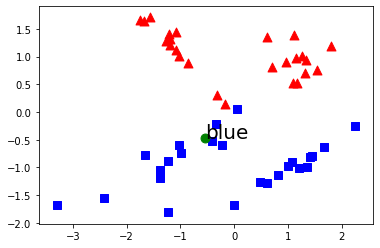

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=50, n_features=2,
                           n_informative =2, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0)
blue = X[y==0]
red = X[y==1]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^') # 빨강색 삼각형
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')# 파랑색 사각형

newcomer = np.random.randn(1,2)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o') # 초록색 원

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
pred = knn.predict(newcomer)

print("prediction:", pred)
plt.annotate('red' if pred==1 else 'blue', xy=newcomer[0], \
             xytext=(newcomer[0]), fontsize=20)

### 손글씨 숫자 분류 예제
* `load_digits()`

first digits : 0


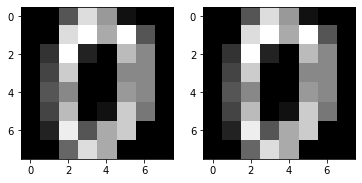

In [2]:
import numpy as np, cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

digits = load_digits()  #Mnist로 도 해보자

print("first digits :", digits.target[0])
plt.subplot(121)
plt.imshow(digits.images[0], cmap='gray')
plt.subplot(122)
plt.imshow(digits.data[0].reshape((8,8)), cmap='gray')
plt.show()

### 손글씨  숫자 분류 예제
* 첫 번째 숫자만 표시

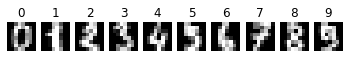

In [3]:
for i in digits.target_names:
    dimg = digits.images[digits.target==i][0]
    plt.subplot(1,10,i+1)
    plt.imshow(dimg, cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()


### 손글씨 숫자 분류 예제
* 훈련 세트와 테스트 세트 분류
* 예측

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    score = knn.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%"%(k, score*100))

k=1, accuracy=99.11%
k=2, accuracy=98.44%
k=3, accuracy=98.67%
k=4, accuracy=98.00%
k=5, accuracy=98.00%
k=6, accuracy=97.56%
k=7, accuracy=97.78%
k=8, accuracy=97.78%
k=9, accuracy=97.78%
k=10, accuracy=97.56%


In [5]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

clf = GridSearchCV(estimator=knn, param_grid={'n_neighbors':range(1, 10)}, cv=2)
clf.fit(X_train, y_train)
display(pd.DataFrame(clf.cv_results_))

print("best param:", clf.best_params_)

estimator = clf.best_estimator_
estimator.score(X_test, y_test)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006476,5.053282e-04,0.051349,0.001508,1,{'n_neighbors': 1},0.979228,0.986627,0.982928,0.003699,1
1,0.005984,2.384186e-07,0.050379,0.000486,2,{'n_neighbors': 2},0.973294,0.976226,0.974760,0.001466,5
2,0.005984,8.344650e-07,0.053357,0.001468,3,{'n_neighbors': 3},0.980712,0.977712,0.979212,0.001500,2
3,0.005986,1.192093e-07,0.051845,0.000984,4,{'n_neighbors': 4},0.976261,0.973254,0.974758,0.001504,6
4,0.006020,5.125999e-06,0.055334,0.001473,5,{'n_neighbors': 5},0.983680,0.973254,0.978467,0.005213,3
5,0.005979,1.192093e-07,0.053861,0.000997,6,{'n_neighbors': 6},0.977745,0.973254,0.975499,0.002245,4
6,0.005983,3.814697e-06,0.052340,0.000482,7,{'n_neighbors': 7},0.977745,0.968796,0.973271,0.004474,7
7,0.005984,1.668930e-06,0.053856,0.000998,8,{'n_neighbors': 8},0.971810,0.967311,0.969560,0.002250,9
8,0.006483,4.991293e-04,0.057849,0.001029,9,{'n_neighbors': 9},0.973294,0.971768,0.972531,0.000763,8


best param: {'n_neighbors': 1}


0.9911111111111112

### 손글씨 숫자 분류 예제
* 손으로 쓴 숫자 인식하기
* 온라인 그림판 : https://sketch.io/sketchpad/

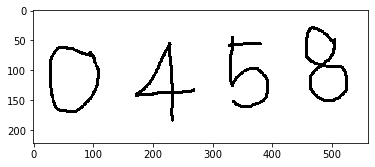

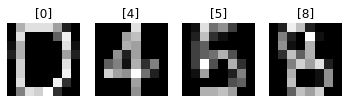

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import img2data

img_path = './img/0458.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(digits.data, digits.target)

numbers = img2data.img2digits(image, (8,8), reshape=True)
for i, n in enumerate(numbers):
    n = np.uint8(n/n.max() * 16) # 0~255 구간을 0~16구간으로 변경
    pred = knn.predict(n)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(n.reshape(8,8), cmap="gray")
    plt.axis("off")
